In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import progressbar
from skimage.feature import greycomatrix, greycoprops

In [ ]:
def disp(img,title='image',cmap=None,size=(7,7)):
    plt.figure(figsize=size,dpi=150)
    plt.title(title)
    plt.imshow(img,cmap=cmap)
    plt.show()

In [ ]:
def kmean(image,k=4):
    # reshape the image to a 2D array of pixels and 3 color values (RGB)
    pixel_values = image.reshape((-1, 3))
    # convert to float
    pixel_values = np.float32(pixel_values*255)
    # define stopping criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 500, 0.01)
    # number of clusters (K)
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # convert back to 8 bit values
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    # reshape back to the original image dimension
    segmented_image = segmented_image.reshape(image.shape)
    disp(segmented_image,title='kmeans',size=(10,10))
    
    return segmented_image,labels,centers

In [ ]:
def kmask(image,labels,c=4,show=False):
    clist=[]
    for i in range(c) :
        masked_image = np.copy(image)
        a=masked_image[:,:,0]
        b=masked_image[:,:,1]
        c=masked_image[:,:,2]
        # convert to the shape of a vector of pixel values
        fmasked_imagea = a.reshape((-1, 1))
        fmasked_imageb = b.reshape((-1, 1))
        fmasked_imagec = c.reshape((-1, 1))
        fmasked = np.zeros((np.shape(fmasked_imagea)[0],3))
        #print(fmasked.shape)
        # color (i.e cluster) to disable
        cluster = i
        fmasked_imagea[labels != cluster] = [0]
        fmasked_imageb[labels != cluster] = [0]
        fmasked_imagec[labels != cluster] = [0]
        # convert back to original shape
        fmasked[:,0]=fmasked_imagea[:,0]
        fmasked[:,1]=fmasked_imageb[:,0]
        fmasked[:,2]=fmasked_imagec[:,0]
        nmasked_image = fmasked.reshape(image.shape).astype('uint8')
        clist.append(nmasked_image)
        if(show==True):
            plt.figure(figsize=(7,7),dpi=100)
            plt.title(str(i))
            ret, nmasked_image = cv2.threshold(nmasked_image,0,255,cv2.THRESH_BINARY)
            plt.imshow(nmasked_image,cmap='gray')
            plt.show()
    return clist


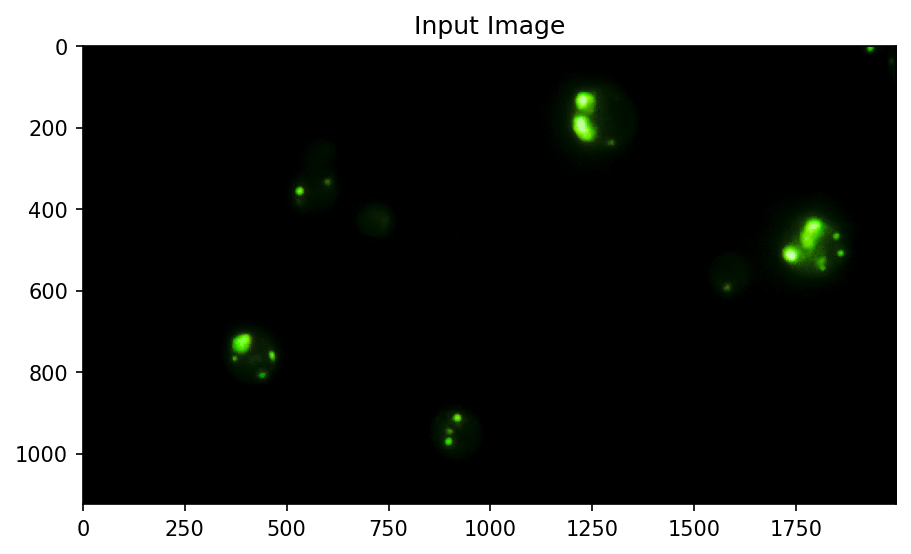

In [ ]:
image=cv2.imread(r'C:\Users\Dell\Desktop\Project\images\Test set\11_Acetate_TDPM3aresize.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
disp(image,'Input Image')

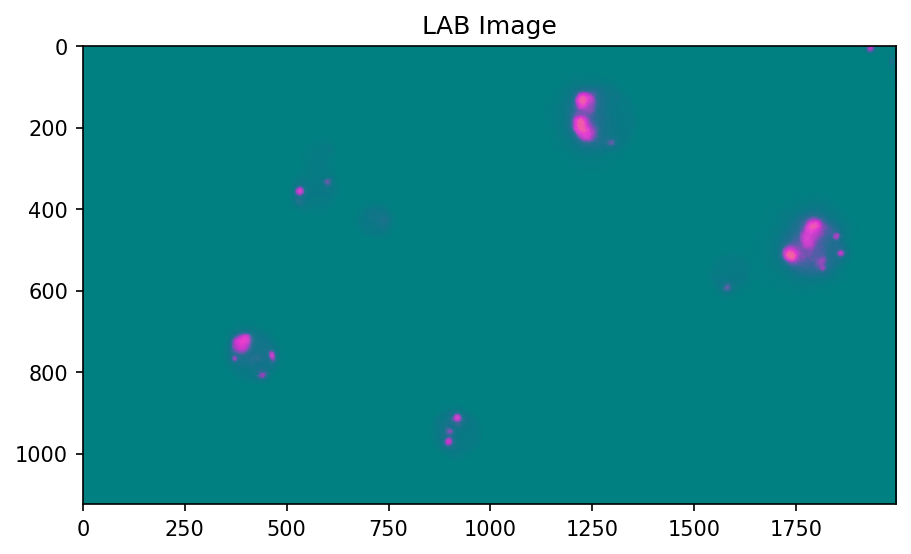

In [ ]:
image=cv2.imread(r'C:\Users\Dell\Desktop\Project\images\Test set\11_Acetate_TDPM3aresize.jpg')
fimage=np.copy(image)
image=cv2.cvtColor(image,cv2.COLOR_BGR2LAB)
disp(image,'LAB Image')

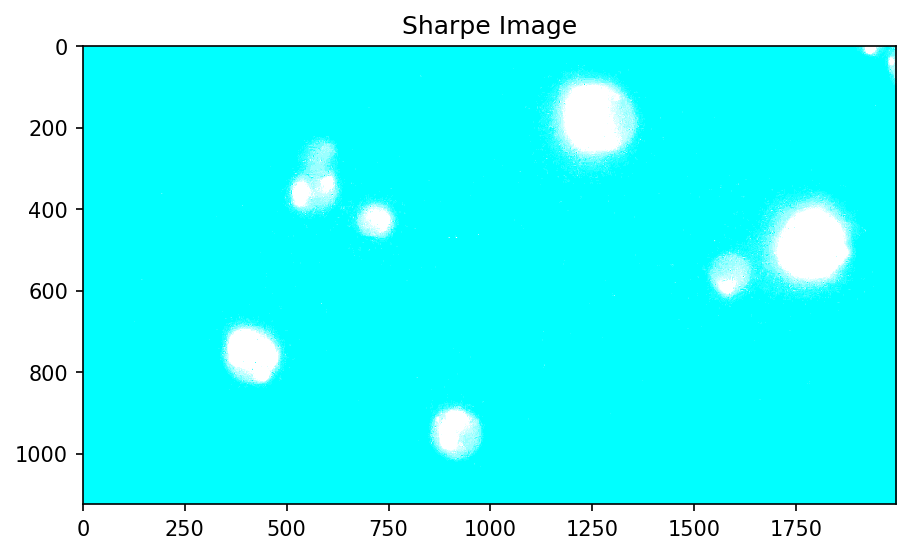

In [ ]:
filter1 = np.array([[-1,-1,-1], [-1,30,-1], [-1,-1,-1]])
sharpe=cv2.filter2D(image,-1,filter1)
disp(sharpe,'Sharpe Image')

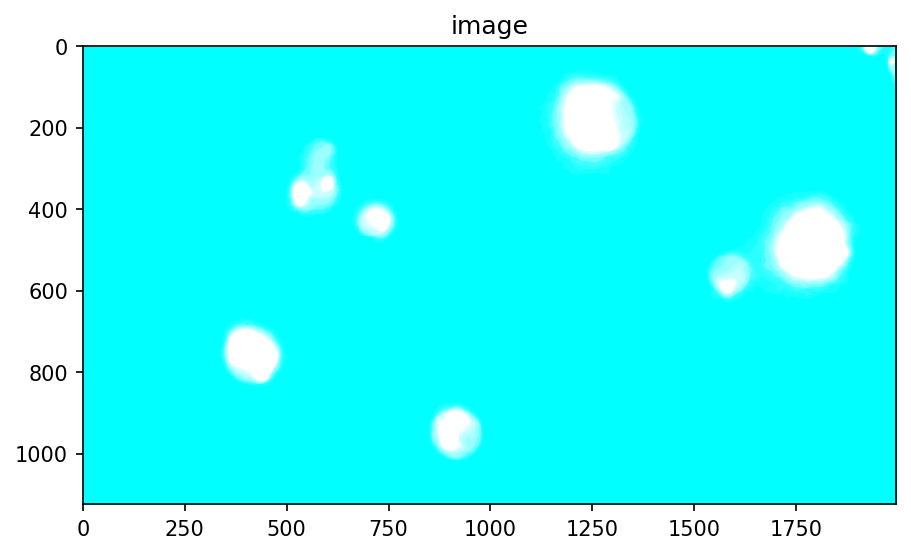

In [ ]:
normalizedImg = cv2.normalize(sharpe,None, 0, 255, cv2.NORM_MINMAX)
normalizedImg = cv2.medianBlur(normalizedImg,15)
disp(normalizedImg)

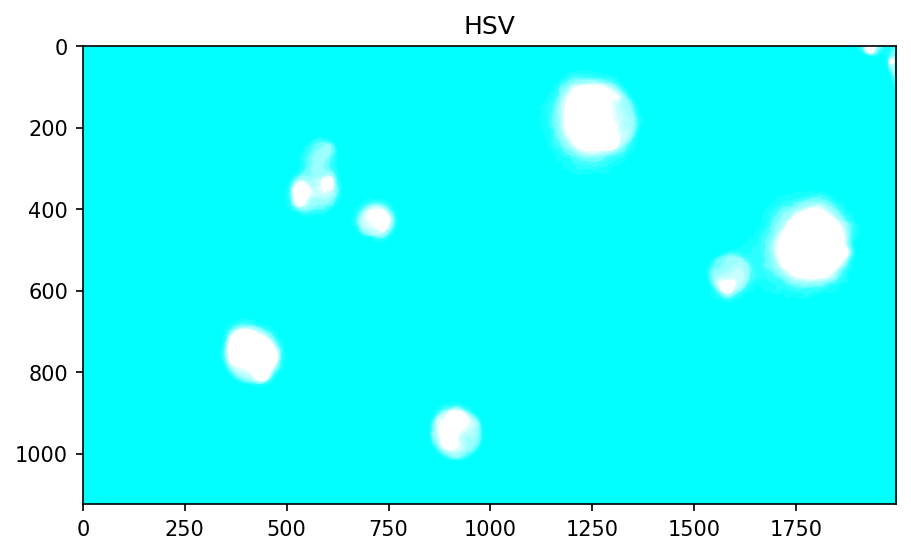

In [ ]:
hsvimg  = normalizedImg#cv2.cvtColor(image,cv2.COLOR_BGR2LAB)
disp(hsvimg,"HSV")

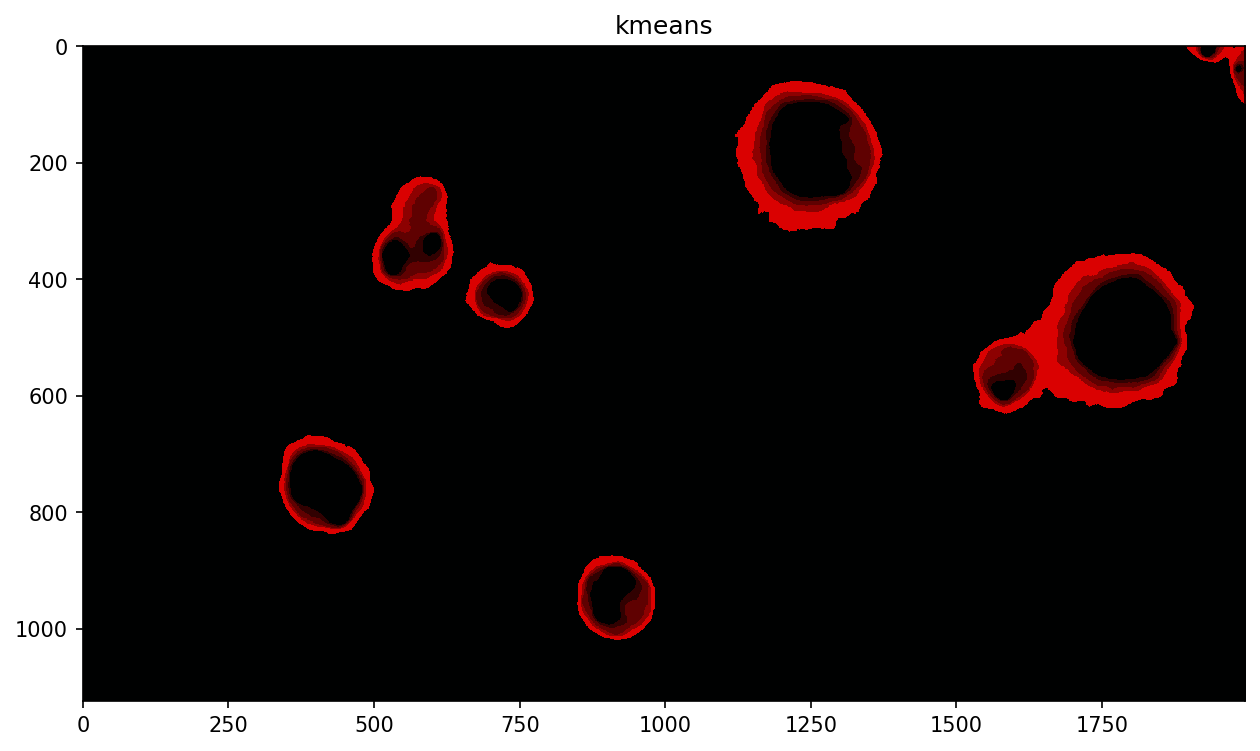

In [ ]:
kre,labels,centers=kmean(hsvimg,k=5)

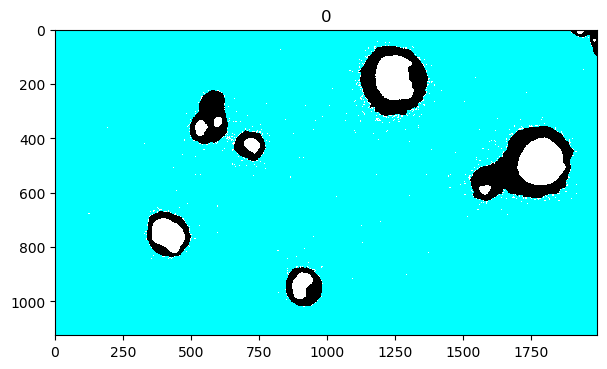

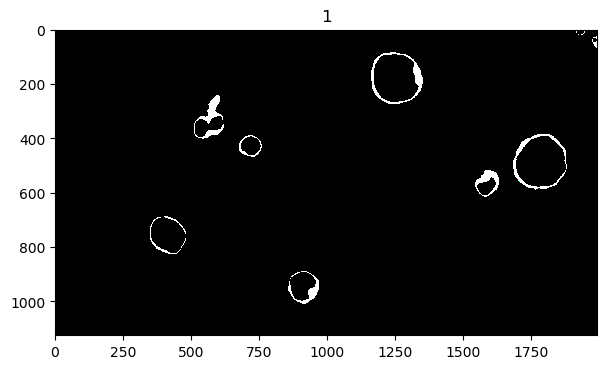

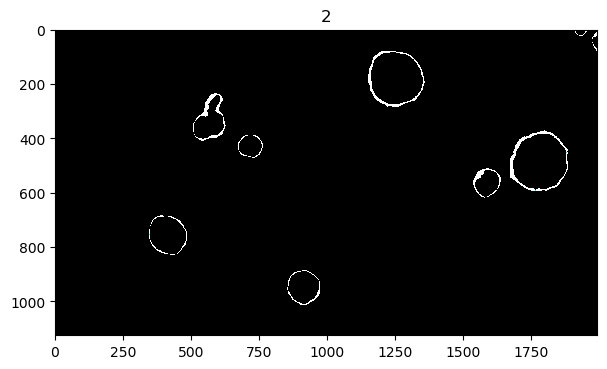

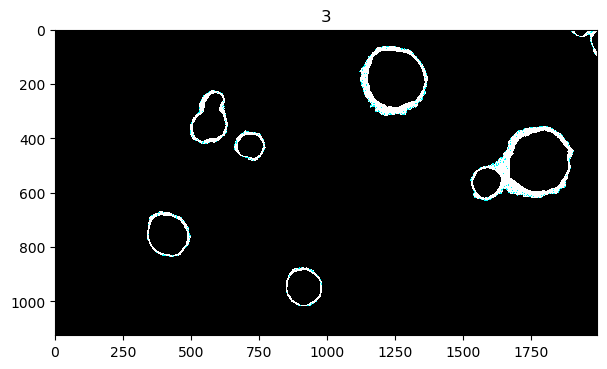

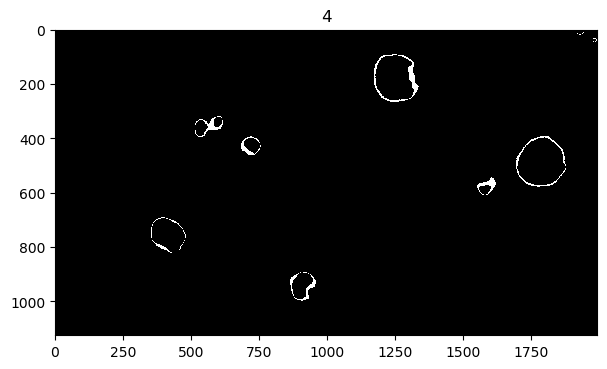

In [ ]:
c=kmask(image,labels,c=5,show=True)

In [ ]:
print("Enter the K-means cell outline number:")
kc = int(input())

Enter the K-means cell outline number:
1


In [ ]:
cmasked_image=c[kc]

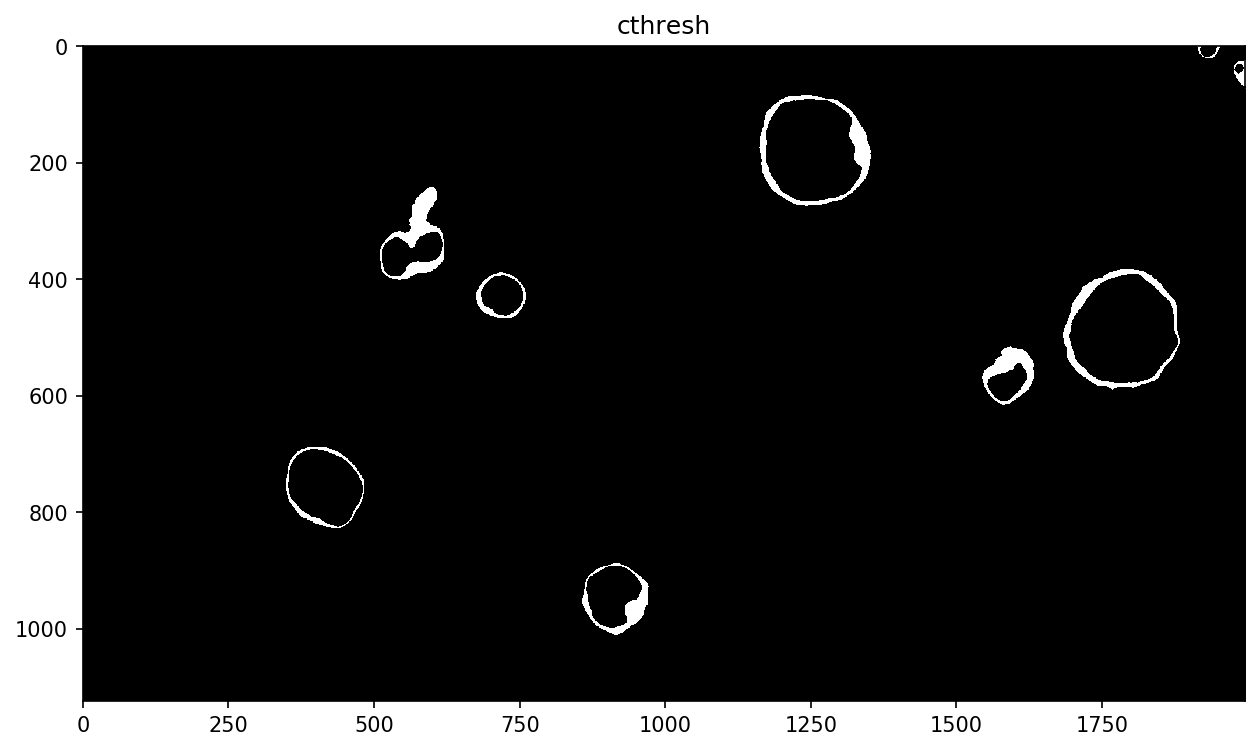

In [ ]:
ngray = cv2.cvtColor(cmasked_image,cv2.COLOR_BGR2GRAY)
ret, cthresh = cv2.threshold(ngray,0,255,cv2.THRESH_BINARY)
plt.figure(figsize=(10,10),dpi=150)
plt.title('cthresh')
plt.imshow(cthresh,cmap='gray')

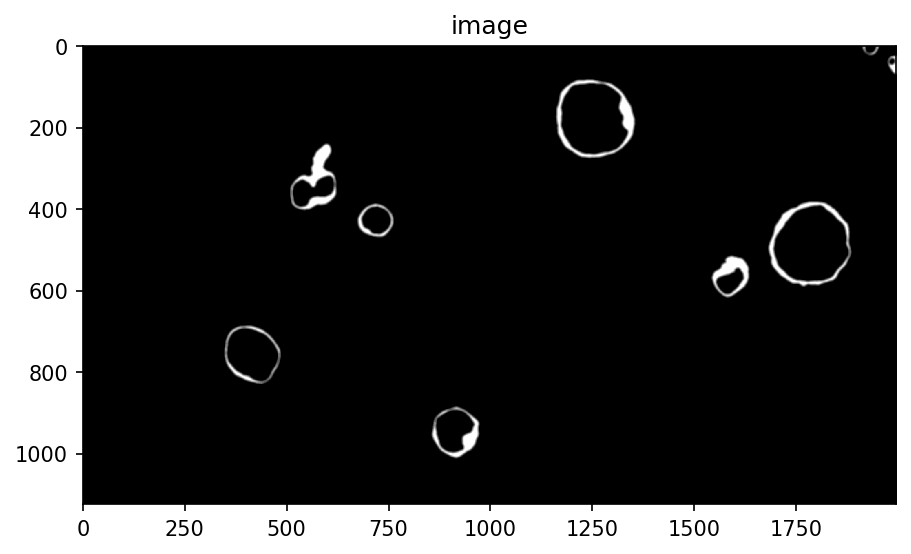

In [ ]:
kernel = np.ones((7,7),np.float32)/47
cthresh = cv2.filter2D(cthresh,-1,kernel)
disp(cthresh,cmap='gray')

In [ ]:
ci=np.copy(cthresh)
fimg=np.copy(fimage)
color=(255,0,0)
overlap=cv2.imread(r'C:\Users\Dell\Desktop\Project\images\Test set\11 Acetate TDPM3b.jpg')

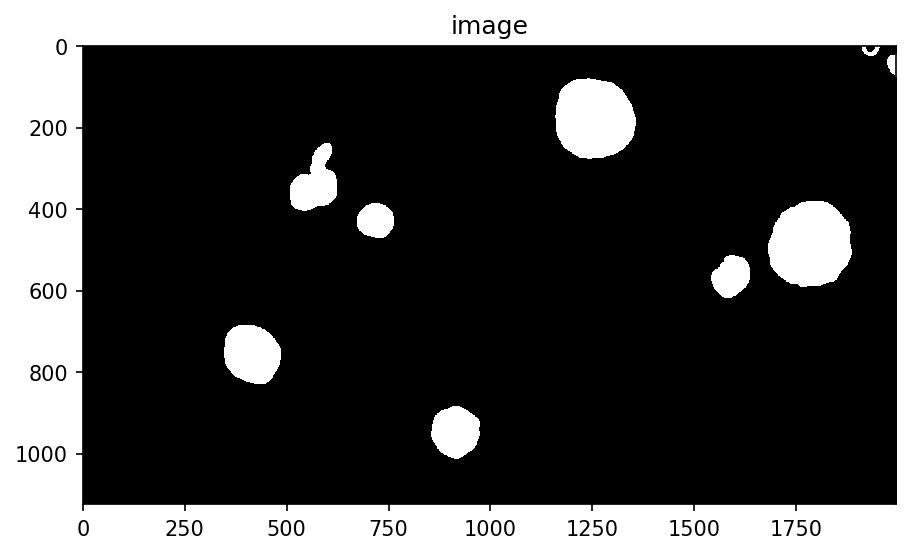

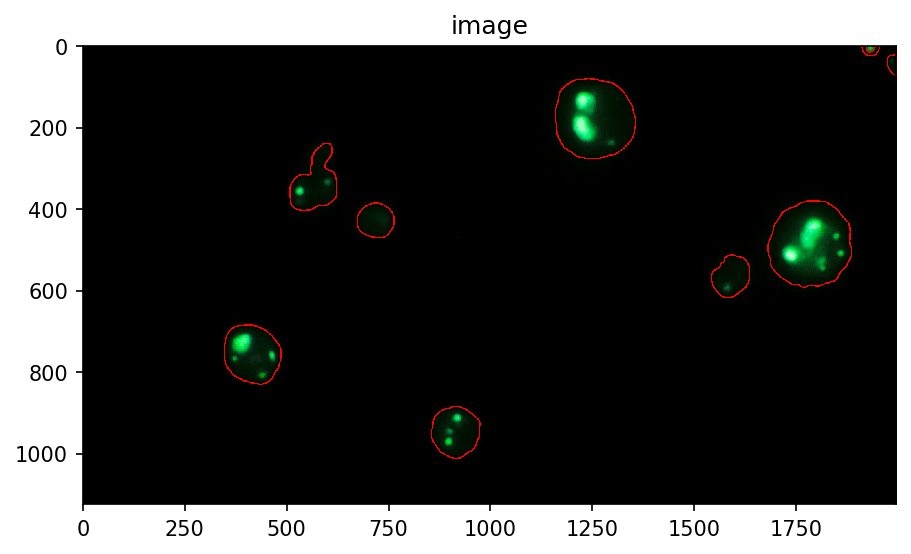

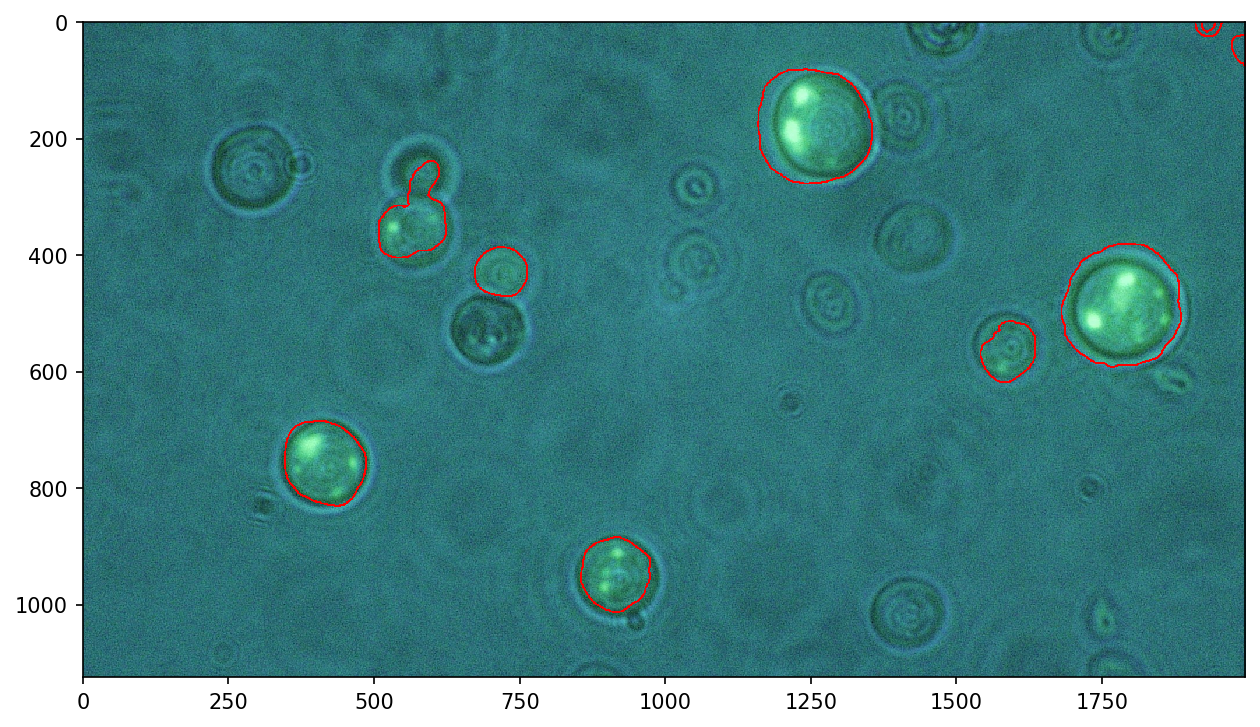

In [ ]:


drawing = np.zeros((ci.shape[0], ci.shape[1], 3), np.uint8)

contours, hierarchy = cv2.findContours(cthresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    # creating convex hull object for each contour
    #
     
    # draw ith convex hull object
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(overlap, contours, i, color, thickness=2, lineType=8)
        cv2.drawContours(fimg, contours, i, color, thickness=2, lineType=8)
        cv2.drawContours(drawing, contours, i, (255,255,255), thickness=cv2.FILLED, lineType=8)

disp(drawing)
disp(fimg)
plt.figure(figsize=(10,10),dpi=150)
plt.imshow(overlap)

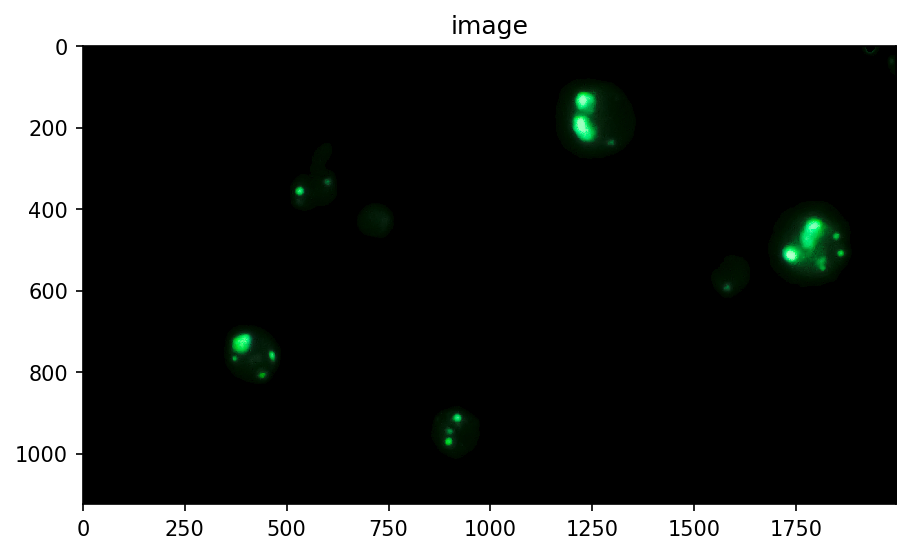

In [ ]:
pn = fimage.copy()
pn[drawing==0] = [0]
pn=pn.astype('uint8')
disp(pn)

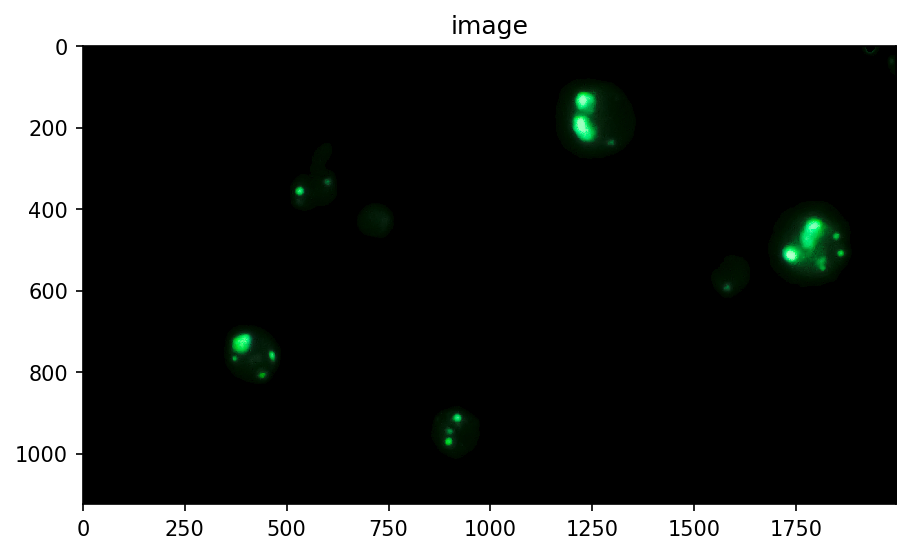

In [ ]:
norm_img = np.zeros(pn.shape)
pn = cv2.normalize(pn,  norm_img, 0, 255, cv2.NORM_MINMAX)
disp(pn)

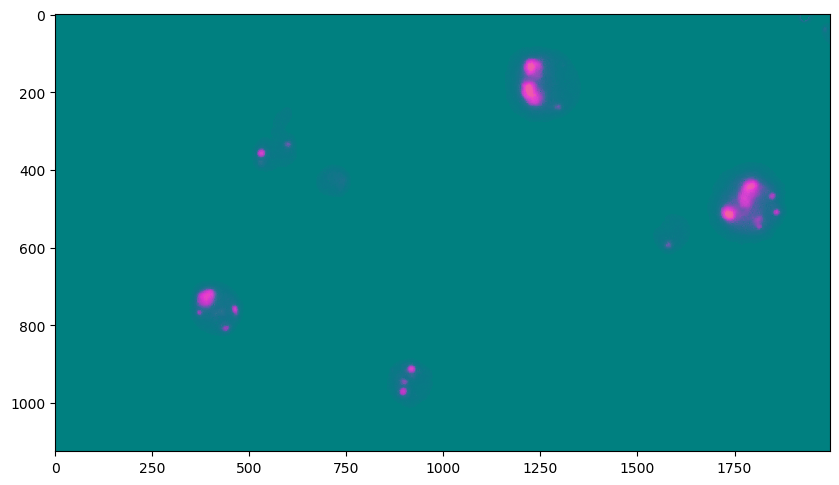

In [ ]:
plt.figure(figsize=(10,10),dpi=100)
labpn=cv2.cvtColor(pn,cv2.COLOR_BGR2LAB)
plt.imshow(labpn)

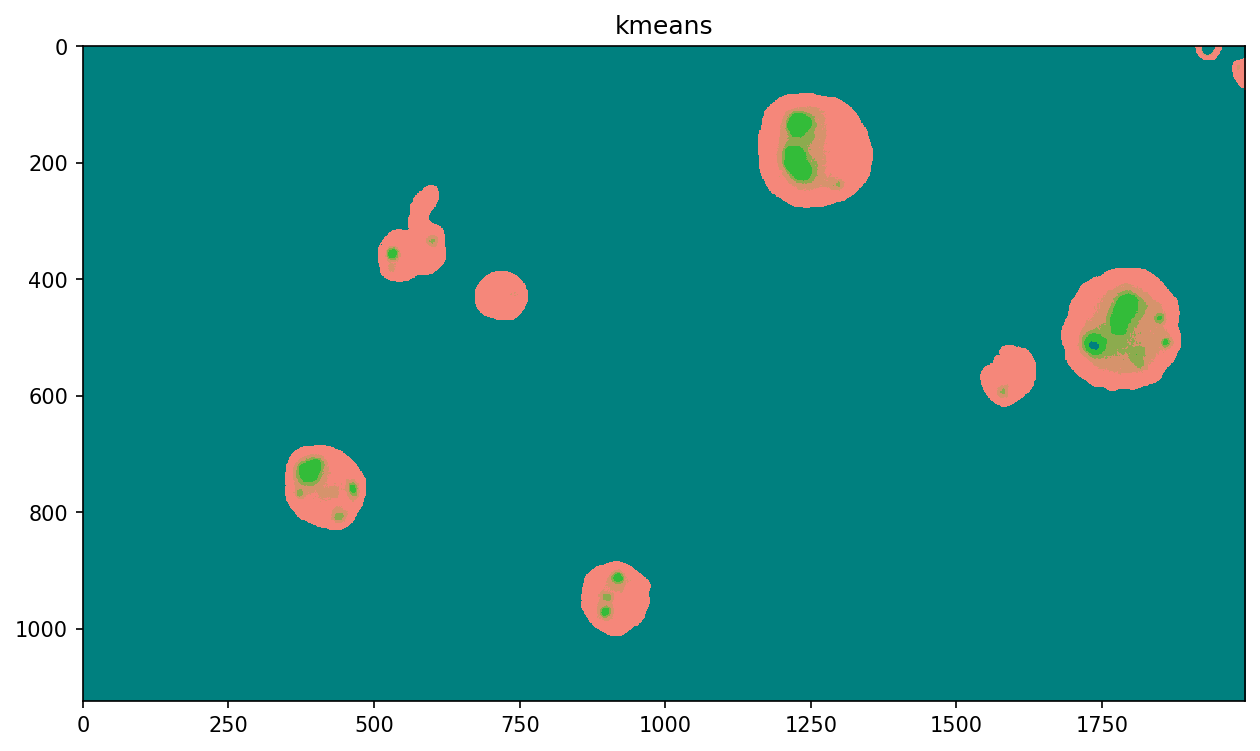

In [ ]:
krepn,labelspn,centerspn=kmean(labpn,k=5)

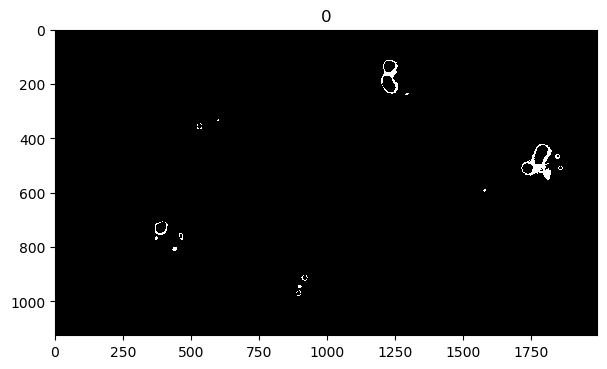

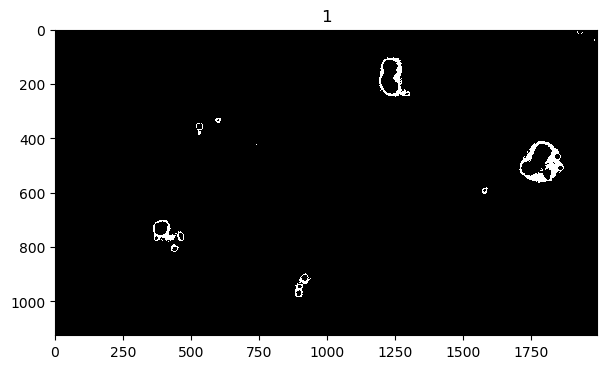

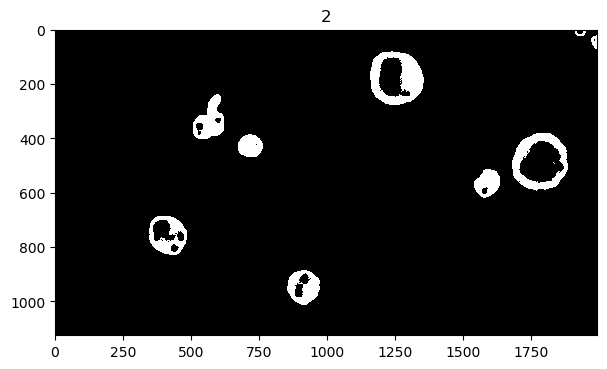

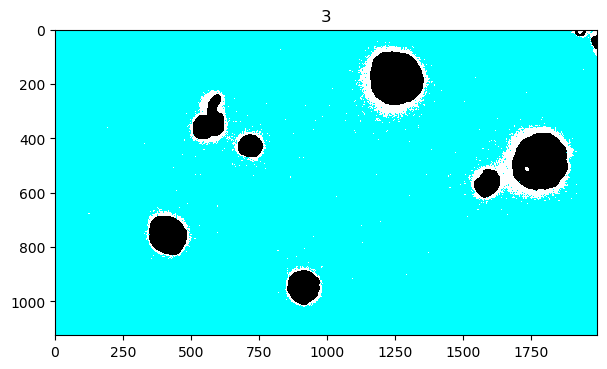

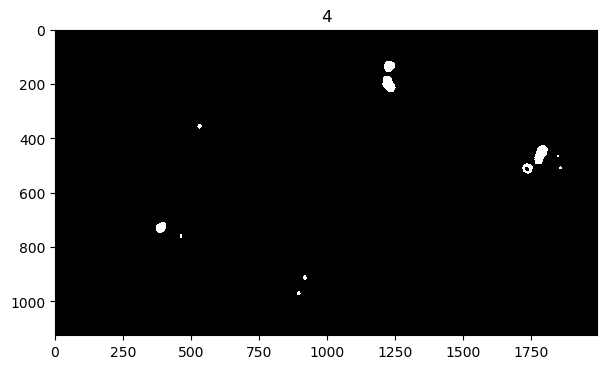

In [ ]:
cp=kmask(image,labelspn,c=5,show=True)

In [ ]:
print('Enter Hotspot number:')
cpi=int(input())
cmasked_image=cp[cpi]


Enter Hotspot number:
4


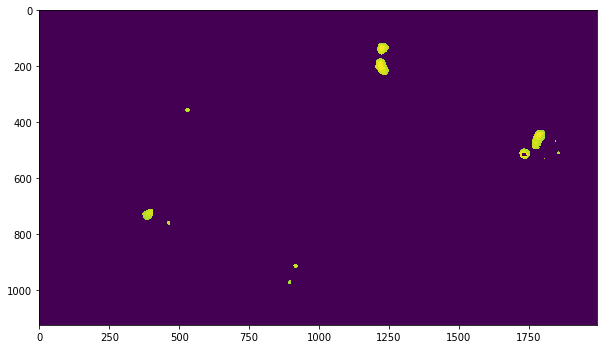

In [ ]:
fimg1=np.copy(image)
#overlap=cv2.imread(r'C:\Users\Dell\Desktop\Project\images\Test set\11 Acetate TDPM3b.jpg')
ci1=cv2.cvtColor(cmasked_image,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(ci1)

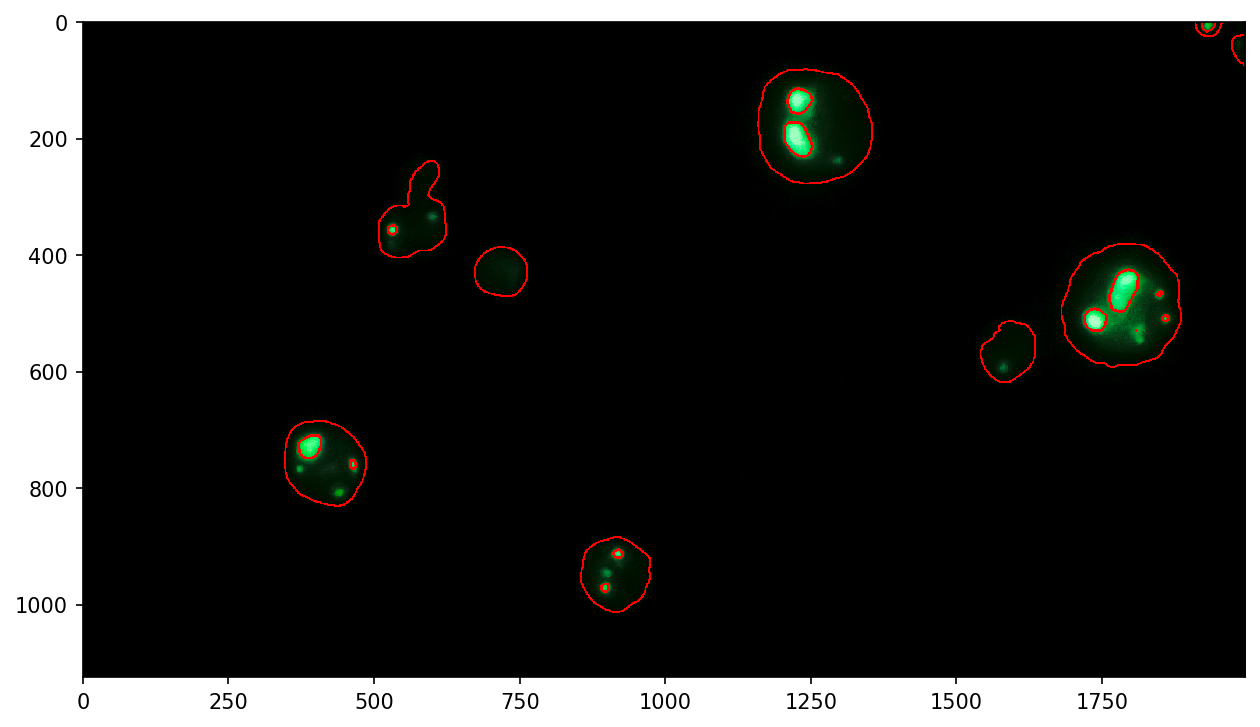

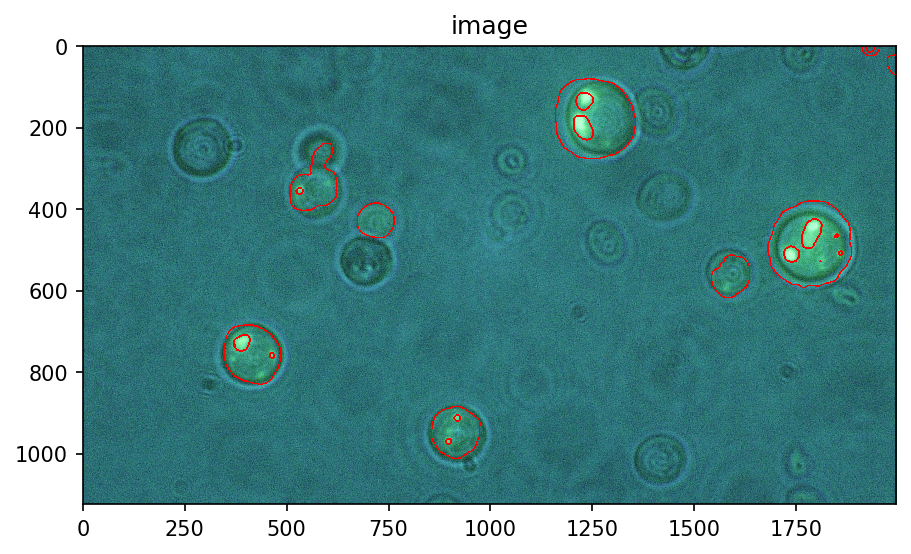

True

In [ ]:
hull1 = []
# calculate points for each contour

# create an empty black image
drawing1 = np.zeros((ci1.shape[0], ci1.shape[1], 3), np.uint8)

contours1, hierarchy1 = cv2.findContours(ci1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours1)):
    # creating convex hull object for each contour
    #
    hull1.append(cv2.convexHull(contours1[i], False)) 
    # draw ith convex hull object
    #if hierarchy1[0][i][3] > 0:
    cv2.drawContours(drawing1, hull1, i, color, thickness=cv2.FILLED, lineType=8)
cell_mask1=cv2.cvtColor(drawing1,cv2.COLOR_BGR2GRAY)
contours1, hierarchy1 = cv2.findContours(cell_mask1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours1)):
    cv2.drawContours(fimg, contours1, i, color, 4, 8)
    cv2.drawContours(overlap, contours1, i, color, 4, 8)

plt.figure(figsize=(10,10),dpi=150)
plt.imshow(fimg)
plt.show()
disp(overlap)
cv2.imwrite(r'C:\Users\Dell\Desktop\Project\images\outkmeans11.JPG',cv2.cvtColor(fimg,cv2.COLOR_BGR2RGB))

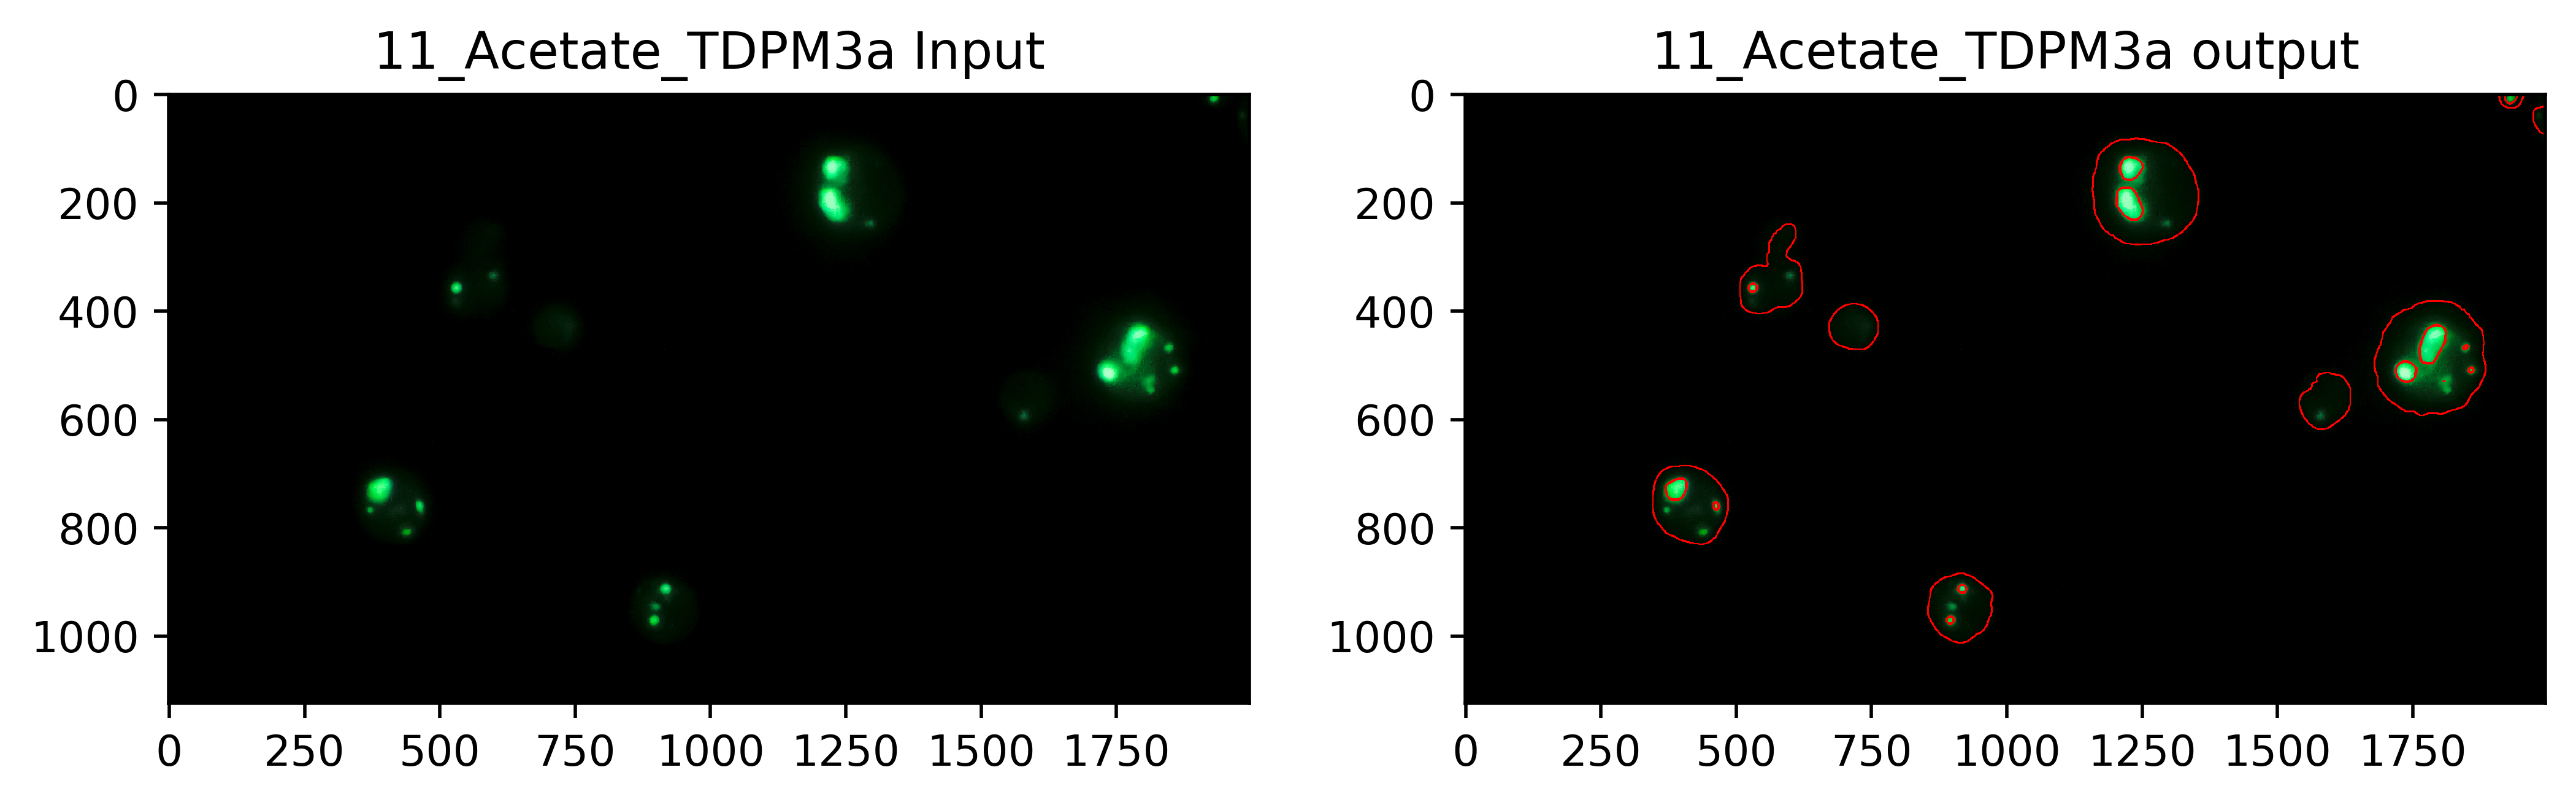

In [ ]:
take=plt.figure(figsize=(10,10),dpi=500)
plt.subplot(121)
plt.title('11_Acetate_TDPM3a Input')
plt.imshow(fimage)
plt.subplot(122)
plt.title('11_Acetate_TDPM3a output')
plt.imshow(fimg)


In [ ]:
disp(overlap)